# Emergency calls to 911: data analysis 

### Proyect description

The following emergency calls data set can be found in the following link: [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The 911 calls data set contains 9 variables 
of which 1 is a dummy variable. Given the description of the variables, differences in the statistics between different localities is a key factor to analyze. Following are the variables that are included in the data set:

**lat**: str - Latitude <br/>
**lng**: str - Longitude <br/>
**desc**: str - Description of the Emergency Call <br/>
**zip**: str - Zipcode <br/>
**title**: str - Title <br/>
**timeStamp**: str - in the format: YYYY-MM-DD HH:MM:SS <br/>
**twp**: str - Township <br/>
**addr**: str  - Address <br/>
**e**: str - Dummy variable set to 1


### Libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

%matplotlib inline

### Exploratory Data Analysis

In [2]:
# Importing the data set and viewing first 5 rows
calls = pd.read_csv('911.csv')
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [3]:
# Description of the data set: number of entries and missing values
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Observation**: There are 9949 entries and most of the variables are complete. However, a few variables: zip, twp and addr have missing values. 

In [4]:
# Frequency information
calls.zip.value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
calls.twp.value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
calls.title.nunique() # not true

110

### Creating new variables for motive tags

In [44]:
calls['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

By observing the data descriptions about the title variable, there are only three categories (motives) of titles. So, we can label each row with the corresponding motive: EMS, Fire and Traffic. 

In [7]:
# Creating a new column string variable based on the the title categories
calls['motive'] = calls.title.apply(lambda title: title.split(':')[0])

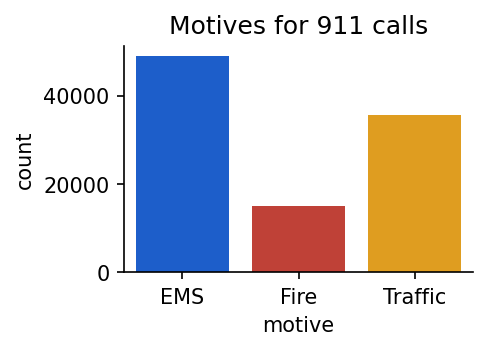

In [8]:
# Visualizing the counts of motive categories
plt.figure(figsize=(3,2), dpi = 150)
sns.countplot(data = calls, 
              x = 'motive', 
              palette = ['#0057e7', '#d62d20', '#ffa700']).set_title('Motives for 911 calls')
sns.despine()
plt.show()

### Working with datetime variables

In [9]:
# Convert strings to timestamp varirables
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [10]:
# Create new columns by breaking down timestamps to h, m and d
calls['Hour'] = calls.timeStamp.apply(lambda time: time.hour)             # extract the hour
calls['Month'] = calls.timeStamp.apply(lambda time: time.month)           # extract the month
calls['Day'] = calls.timeStamp.apply(lambda time: time.dayofweek)         # extract the day 

In [11]:
# Verify that the data is complete
print(len(calls.Month.value_counts()) == 12)                   # There are 12 months in a year
print(len(calls.Hour.value_counts().sort_index()) == 24)       # There are 24 hours in a day
print(len(calls.Day.value_counts()) == 7)                      # There are 7 days in a week

False
True
True


**Observation**: There are missing months values

In [12]:
# Create a dictorionary to map each index value to a string for each day
map_this = {0:'Mon',
            1:'Tue',
            2:'Wed',
            3:'Thu',
            4:'Fri',
            5:'Sat',
            6:'Sun'}

# Create a new column for the days
calls['Day'] = calls.Day.map(map_this)

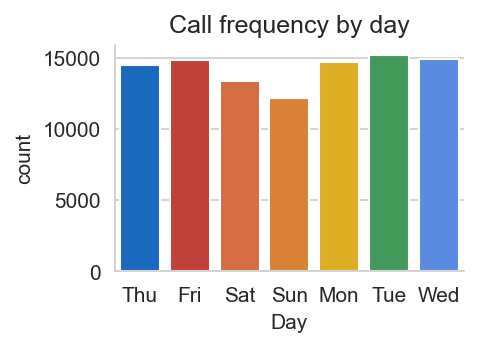

In [13]:
# Visualize the counts by day
sns.set_style('whitegrid')

pal = ["#0066da","#d62d20","#ee6229","#f3801d","#fcbc05","#34a853","#4385f5"]

plt.figure(figsize=(3,2), dpi = 150)
sns.countplot(data = calls, 
              x = 'Day', 
              palette = pal).set_title('Call frequency by day')
sns.despine()
plt.show()

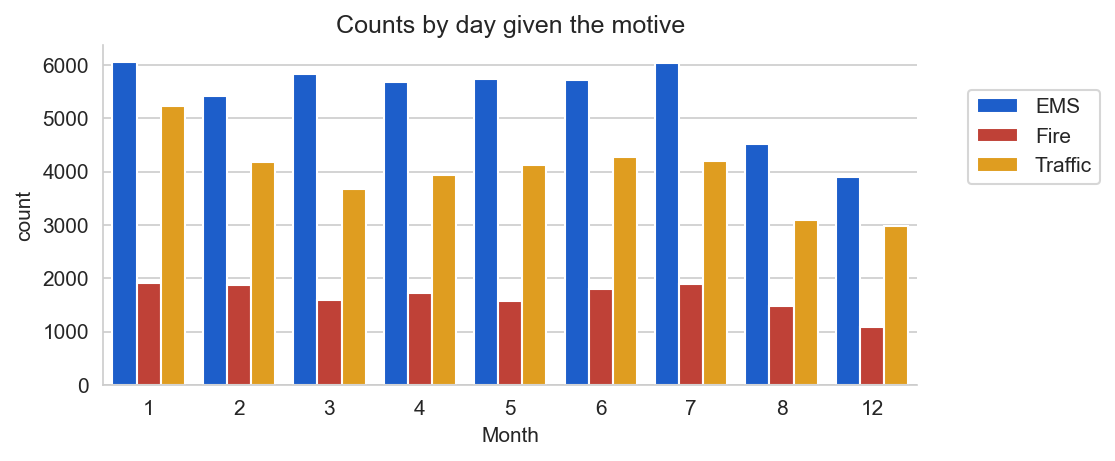

In [14]:
# Plot the counts by month and break by motive
plt.figure(figsize=(7,3), dpi = 150)
sns.countplot(data = calls, 
              x = 'Month', 
              palette = ['#0057e7', '#d62d20', '#ffa700'], 
              hue = 'motive').set_title('Counts by day given the motive')

plt.legend(bbox_to_anchor = (1.05, 0.9), loc = 2)
sns.despine()
plt.show()

### Trend analysis by hours, days of the week and months

In [15]:
# What is the actual trend of calls counts by month?
byMonth = calls.groupby('Month')
byMonth.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,motive,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


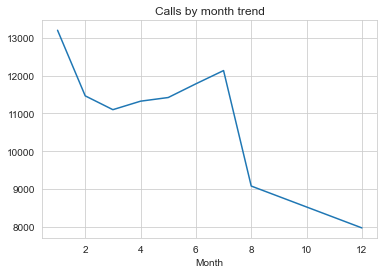

In [16]:
# Visualize the calls by month trend
byMonth.count().motive.plot()

plt.title('Calls by month trend')
plt.show()

**Observation**: Looks like people have emergencies mostly around January and July. And seem to really go down as soon as the new year starts. 

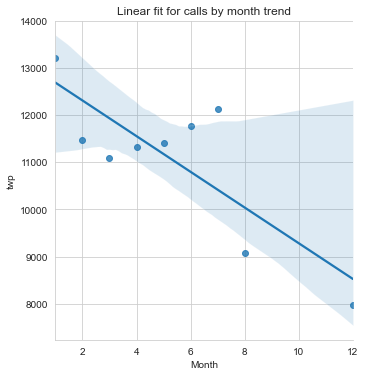

In [17]:
# Linear fit for calls by month
sns.lmplot(data = byMonth.count().reset_index(), 
           x = 'Month',
           y = 'twp')
plt.title('Linear fit for calls by month trend')
plt.show()

**Observation**: there is quite a decrease in incidences over the year with a couple of interesing outliers at the beginning of the year.

In [18]:
# Parse dates to Date column
calls['Date'] = calls.timeStamp.apply(lambda time: time.date())

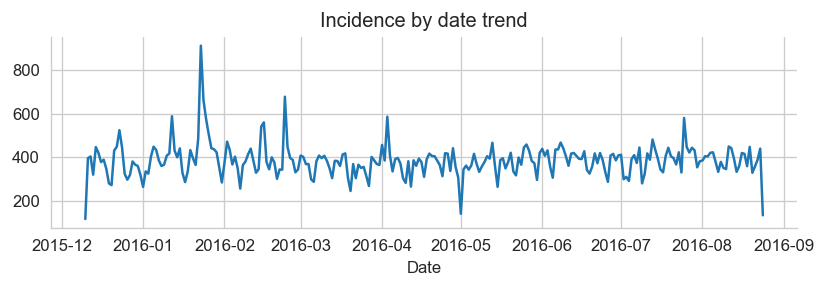

In [19]:
# Incidence trand over 2015 and 2016
plt.figure(figsize=(7,2.5), dpi = 120)
calls.groupby('Date').count()['twp'].plot()
sns.despine()
plt.title('Incidence by date trend')

plt.tight_layout()

**Observation**: The call counts are quite uniform, however the begining of 2016 year has quite large peaks at certarin month which correspond to the outliers found on the linear regression plot. 

In [47]:
# Group by Hours and Day
dayHour = calls.groupby(by=['Day','Hour']).count()['motive'].unstack()  # day as index and hour as column
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


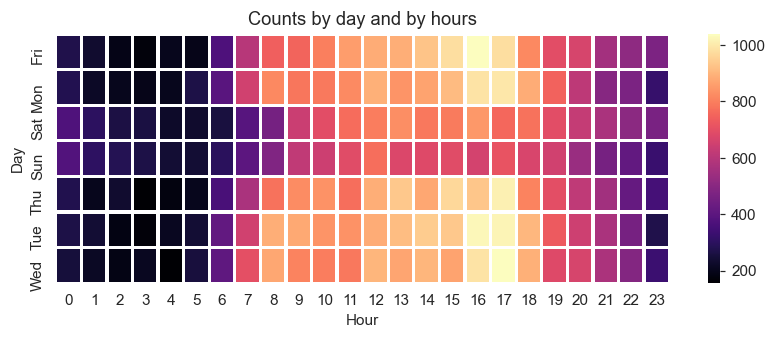

In [43]:
# Heatmap for counts by day and by hour
plt.figure(figsize=(9,3), dpi =110)

sns.heatmap(dayHour,cmap='magma', 
            lw=1.5, 
            linecolor='white')

plt.title('Counts by day and by hours')

plt.show()

**Observation**: Regarding incidence occurance, there are less calls on Sunday and Saturday, and if these do happen they are likely to occur from 10AM to 6PM. Peak hours on the rest of the days are around 4PM and 5PM. It is rather unlikely for calls to happen around sleep time rainging from 12AM to 6PM. Therefore, incidents (calls) are likely to happen during the working hours and most probably after work. For example, on the way home back from work.